# Importing libraries

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [26]:
df=pd.read_csv("insurance.csv")

# Information of dataset

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
encode=LabelEncoder()

In [11]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [27]:
df["sex"]=encode.fit_transform(df["sex"])
df["smoker"]=encode.fit_transform(df["smoker"])
df["region"]=encode.fit_transform(df["region"])

In [28]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


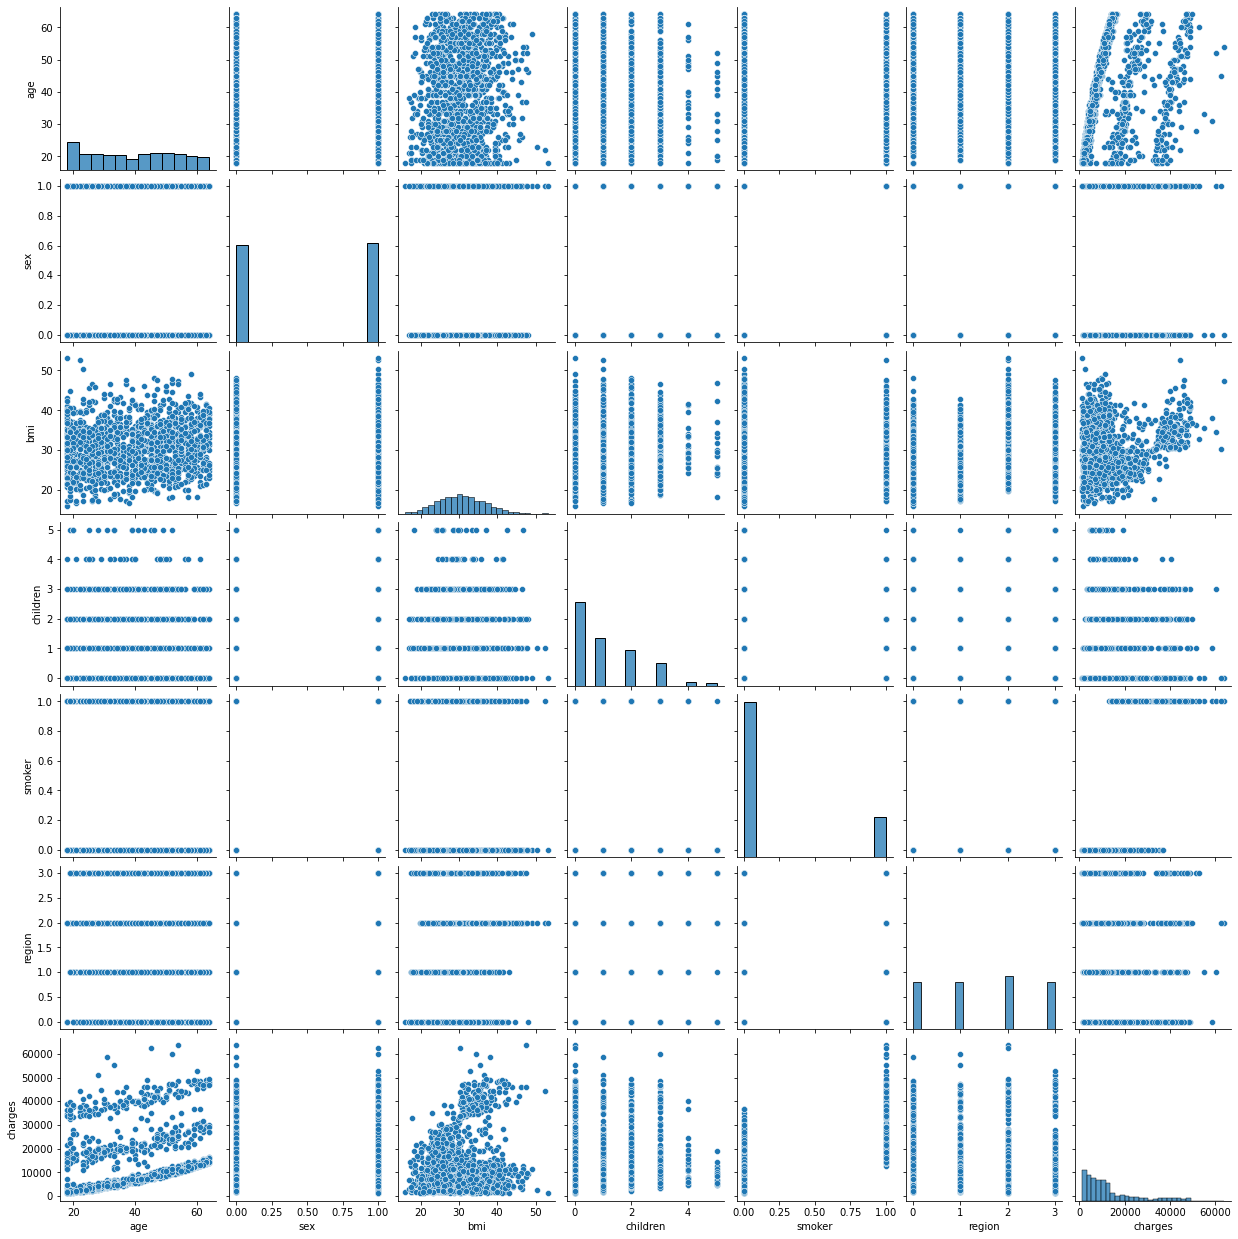

In [29]:
sns.pairplot(df)

<AxesSubplot:ylabel='charges'>

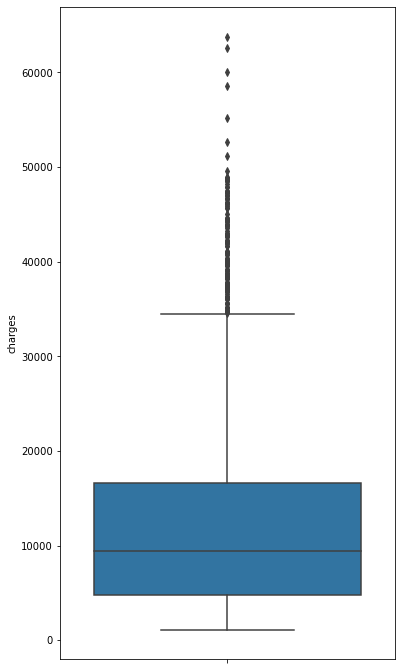

In [37]:
plt.figure(figsize=(6,12))
sns.boxplot(y=df["charges"])

<AxesSubplot:ylabel='bmi'>

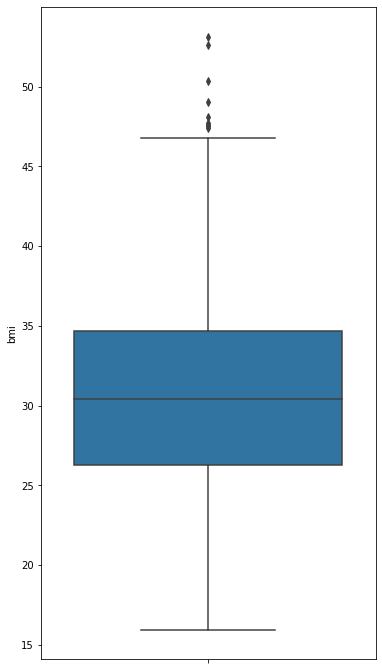

In [36]:
plt.figure(figsize=(6,12))
sns.boxplot(y=df["bmi"])

<AxesSubplot:>

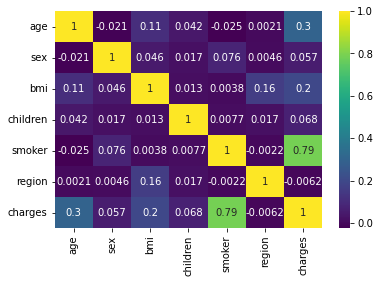

In [38]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [78]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [39]:
scale=MinMaxScaler()

In [84]:
xtrain=scale.fit_transform(xtrain)
xtest=scale.transform(xtest)

In [85]:
lr=LinearRegression()
lr_predict=lr.fit(xtrain,ytrain).predict(xtest)

In [86]:
knr=KNeighborsRegressor()
knr_predict=knr.fit(xtrain,ytrain).predict(xtest)

In [98]:
dtcr=DecisionTreeRegressor()
dtcr_predict=dtcr.fit(xtrain,ytrain).predict(xtest)

In [88]:
sgdr=SGDRegressor()
sgdr_predict=sgdr.fit(xtrain,ytrain).predict(xtest)

In [101]:
lr_score=mean_squared_error(lr_predict,ytest)**.5

In [102]:
knr_score=mean_squared_error(knr_predict,ytest)**.5

In [103]:
dtcr_score=mean_squared_error(dtcr_predict,ytest)**.5

In [104]:
sgdr_score=mean_squared_error(sgdr_predict,ytest)**.5

<AxesSubplot:>

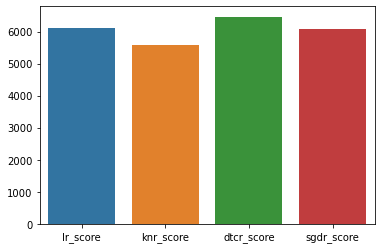

In [108]:
sns.barplot(y=[lr_score,knr_score,dtcr_score,sgdr_score],x=["lr_score","knr_score","dtcr_score","sgdr_score"])